# Decision Tree Classification
Source: https://www.datacamp.com/tutorial/decision-tree-classification-python

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/dataset/global_bleaching_environmental_comma.csv'
df = pd.read_csv(url)
df.head()

Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic   -9999     Tropical Atlantic   
1    Pacific   -9999  Eastern Indo-Pacific   
2   Atlantic   -9999     Tropical Atlantic   
3   Atlantic   -9999     Tropical Atlantic   
4   Atlantic   -9999     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdom  ...   
3  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   
4  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   

  TSA_FrequencyMax TSA_FrequencyMean TSA_DHW  TSA_DHW_Standard_Deviation  \
0              5.0               0.0    0.00                        0.74   
1              4.0               0.0    0.26                        0.67   
2              7.0               0.0    0.00                        1.04   
3              4.0               0.0    0.00                        0.75   
4              5.0               0.0    0.00                        0.92   

  TSA_DHWMax  TSA_DHWMean        Date  \
0       7.25         0.18  15/09/2005   
1       4.65         0.19  15/03/1991   
2      11.66         0.26  15/01/2006   
3       5.64         0.20  15/04/2006   
4       6.89         0.25  15/04/2006   

                                       Site_Comments  \
0                                              -9999   
1  The bleaching does not  appear to have gained ...   
2                                              -9999   
3                                              -9999   
4                                              -9999   

                                     Sample_Comments  Bleaching_Comments  
0                                              -9999               -9999  
1  The bleaching does not  appear to have gained ...               -9999  
2                                              -9999               -9999  
3                                              -9999               -9999  
4                                              -9999               -9999  

[5 rows x 62 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [4]:
df=df.replace(to_replace=-9999,value=0)
df=df.replace(to_replace="-9999",value="0")
df=df.replace(to_replace="Population",value="1")

In [5]:
print(df["Bleaching_Level"].unique())

['0' '1']


SVM Single-class Classification

In [6]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyoff

In [7]:
# counting the total output data from purchased column
target_balance = df['Bleaching_Level'].value_counts().reset_index()

# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Not bleached', 'Bleached'],
    y = target_balance['Bleaching_Level']
)

# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [8]:
# training and testing data
from sklearn.model_selection import train_test_split

# split the data into inputs and outputs
X = df[['Temperature_Mean', 'Windspeed']]
y = df['Bleaching_Level'] # target class

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.59501015375689


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.179333 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.179333 to fit



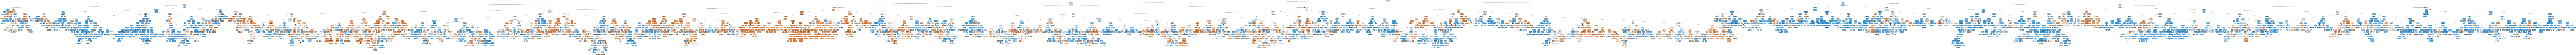

In [17]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Temperature_Mean', 'Windspeed']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6400734938593946
